In [1]:
print("Hello World!")

Hello World!


In [2]:
"""
Create a function to download and extract data automatically
"""
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + '/housing.tgz'

def fetch_housing_data(housing_url=HOUSING_URL,housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path,'housing.tgz')
    urllib.request.urlretrieve(housing_url,tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [3]:
#Run the function
fetch_housing_data()

In [4]:
"""
Create a function to load the data automatically
"""
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path,'housing.csv')
    return pd.read_csv(csv_path)

In [5]:
#Run the function
housing = load_housing_data()

In [6]:
#Explore data to gain insights
#Notice that ocean_proximity field has repetitive  categories,we might wonder what are other categories
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
#Explore Data types and notice that total_bedrooms has missing values
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
#Find out other categories of the ocean_proximity field
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
#Find out the summary of each numerical field using describe() method
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


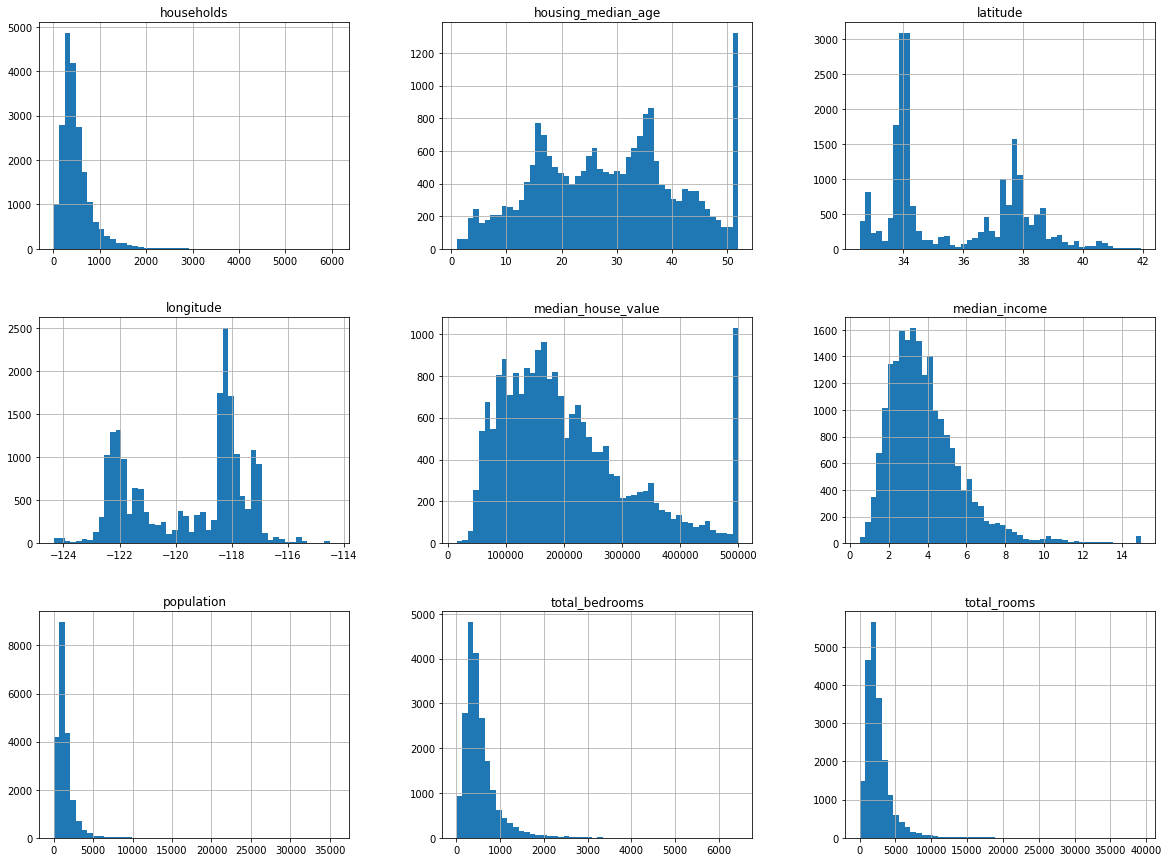

In [10]:
#plot histograms for each field using matplotlib library to get a feel for the type of data we are dealing with.
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(20,15))
plt.show()

In [11]:
#median_income, housing_median_age and median_house values are capped
#the distrubitions are tail heavy
#the scales of attributes are very different

In [12]:
#divide income in to 5 categories.
import numpy as np
housing["income_cat"]=np.ceil(housing["median_income"]/1.5)
housing["income_cat"].where(housing["income_cat"] < 5,5.0,inplace=True)

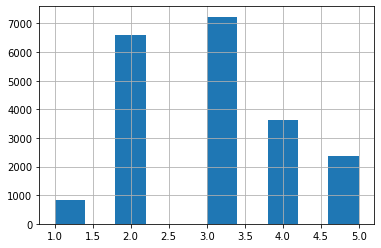

In [13]:
housing["income_cat"].hist()

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit

In [15]:
#peform stratified-sampling and divide the data into test and train sets.
split = StratifiedShuffleSplit(n_splits=2,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [16]:
housing["income_cat"].value_counts()/ len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [17]:
#Values are similar to the original set indicating a very low sampling bias.
strat_train_set["income_cat"].value_counts() / len(strat_train_set)

3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114402
1.0    0.039850
Name: income_cat, dtype: float64

In [18]:
#Test set has similar values with the train set indicating a stratified-sampling.
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

In [19]:
for set in (strat_train_set,strat_test_set):
    set.drop(['income_cat'],axis =1 ,inplace=True)

In [20]:
housing = strat_train_set.copy()

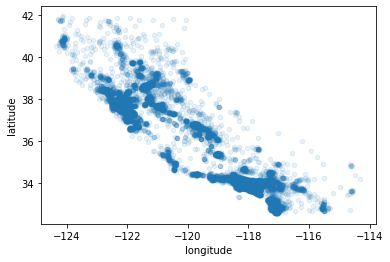

In [21]:
#visualize the data 
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.1)

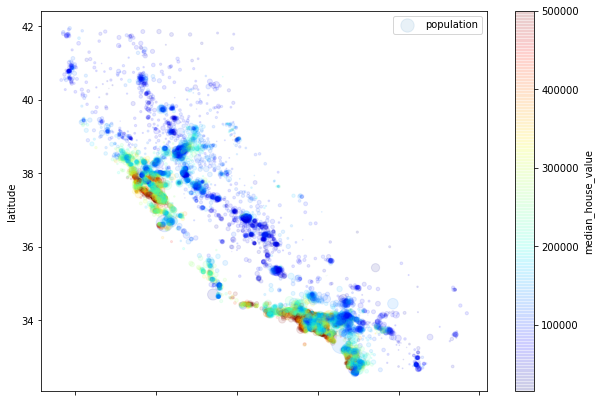

In [22]:
#gain some insights by including population and house value to the visualization
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.1,s=housing["population"]/100,label="population",figsize=(10,7),c="median_house_value",cmap=plt.get_cmap("jet"),colorbar=True,)
plt.legend()

In [23]:
#find the correlations between median_house_value and median_income
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687014
total_rooms           0.139801
housing_median_age    0.098433
households            0.069613
total_bedrooms        0.054374
population           -0.021903
longitude            -0.043442
latitude             -0.144854
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4ee2176f60>,
      dtype=object)

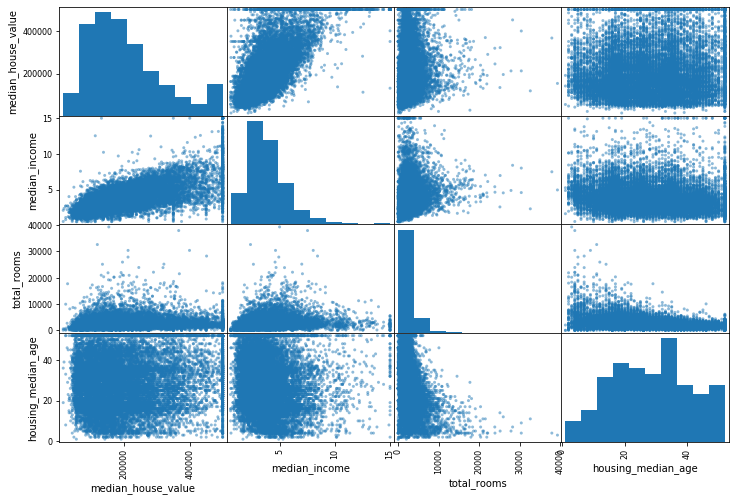

In [24]:
#visualize correletions of several fields.
from pandas.plotting import scatter_matrix
attributes = ["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))

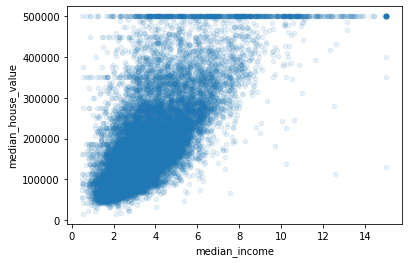

In [25]:
housing.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.1)

In [26]:
#create attributes which might have correlations with median_house_value.
housing["rooms_per_household"]=housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"]=housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687014
rooms_per_household         0.154133
total_rooms                 0.139801
housing_median_age          0.098433
households                  0.069613
total_bedrooms              0.054374
population                 -0.021903
population_per_household   -0.027443
longitude                  -0.043442
latitude                   -0.144854
bedrooms_per_room          -0.256332
Name: median_house_value, dtype: float64

In [27]:
housing = strat_train_set.drop("median_house_value",axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [28]:
#Replace numerical missing values with their medians.
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

housing_num = housing.drop("ocean_proximity",axis=1)

imputer.fit(housing_num)


X = imputer.transform(housing_num)

housing_tr = pd.DataFrame(X,columns=housing_num.columns)

In [29]:
imputer.statistics_

array([-118.49  ,   34.26  ,   29.    , 2123.5   ,  434.    , 1166.    ,
        409.    ,    3.5341])

In [30]:
#transform categorical values in to numerical.
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat = housing["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

array([0, 1, 0, ..., 0, 3, 0])

In [31]:
#one hot encode the numerical categorical values.
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [32]:
#do the 2 above steps by using LabelBinarizer.
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0]])

In [33]:
#Writing a function to create and add the previously created attributes.
rooms_ix, bedrooms_ix, population_ix, household_ix =  [
    list(housing.columns).index(col) 
    for col in ('total_rooms','households','total_bedrooms','population')]

from sklearn.preprocessing import FunctionTransformer

def add_extra_features(X,add_bedrooms_per_room=True):
    rooms_per_household = X[:,rooms_ix]/X[:,household_ix]
    population_per_household = X[:,population_ix]/X[:,household_ix]
    if add_bedrooms_per_room:
        bedrooms_per_room = X[:,bedrooms_ix]/X[:,rooms_ix]
        return np.c_[X,rooms_per_household,population_per_household,bedrooms_per_room]
    else:
        return np.c_[X,rooms_per_household,population_per_household]

attr_adder  = FunctionTransformer(add_extra_features,kw_args={'add_bedrooms_per_room':False})
housing_extra_attribs = attr_adder.fit_transform(housing.values)

In [34]:
#Turning the numpy array to a pandas dataframe.
pd.DataFrame(housing_extra_attribs,
             index=housing.index,
             columns=list(housing.columns)+['rooms_per_household','population_per_household']
            )

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
5288,-118.47,34.05,27,4401,1033,1725,962,4.175,<1H OCEAN,2.5513,0.598841
12865,-121.34,38.69,17,1968,364,996,331,3.7031,INLAND,1.9759,0.365462
9174,-118.52,34.39,21,5477,1275,3384,1222,3.6625,<1H OCEAN,1.6185,0.376773
17247,-119.7,34.43,52,1364,460,804,400,2.375,<1H OCEAN,1.69652,0.572139
14138,-117.07,32.74,37,1042,205,589,208,2.6629,NEAR OCEAN,1.7691,0.348048
...,...,...,...,...,...,...,...,...,...,...,...
641,-122.14,37.73,52,2024,320,823,334,5,NEAR BAY,2.4593,0.388821
9958,-122.33,38.39,36,831,122,272,109,6.3427,INLAND,3.05515,0.448529
5196,-118.27,33.94,43,1309,344,1182,340,1.6625,<1H OCEAN,1.10745,0.291032
245,-122.21,37.78,43,1702,460,1227,407,1.7188,NEAR BAY,1.38712,0.374898


In [35]:
type(housing_labels)

pandas.core.series.Series

In [36]:
#creating and applying a pipeline to numeric values.
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='median')),#Replaces missing values with median
    ('attribs_adder',FunctionTransformer(add_extra_features)),#Adds extra attributes 
    ('std_scaler',StandardScaler())#applies standard scaling
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [37]:
housing_num_tr

array([[ 0.54897458, -0.74027358, -0.13156762, ...,  0.48953173,
         0.77654487,  0.33589494],
       [-0.88297552,  1.4315849 , -0.92675229, ..., -0.00172812,
        -0.15536479, -0.55866908],
       [ 0.52402771, -0.58112878, -0.60867842, ..., -0.3068696 ,
        -0.11019778,  0.4162735 ],
       ...,
       [ 0.64876204, -0.79176161,  1.14072785, ..., -0.74319198,
        -0.45257163,  1.06640489],
       [-1.31705098,  1.00563852,  1.14072785, ..., -0.50441126,
        -0.11768459,  0.70056347],
       [-1.10250794,  0.74351767, -0.84723382, ..., -0.51483056,
        -0.61577269, -0.18931819]])

In [38]:
#create the final pipeline and apply it
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attrib = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ('num',num_pipeline,num_attribs),
    ('cat',OneHotEncoder(),cat_attrib)
])

housing_prepared = full_pipeline.fit_transform(housing)

In [39]:
housing_prepared

array([[ 0.54897458, -0.74027358, -0.13156762, ...,  0.        ,
         0.        ,  0.        ],
       [-0.88297552,  1.4315849 , -0.92675229, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.52402771, -0.58112878, -0.60867842, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.64876204, -0.79176161,  1.14072785, ...,  0.        ,
         0.        ,  0.        ],
       [-1.31705098,  1.00563852,  1.14072785, ...,  0.        ,
         1.        ,  0.        ],
       [-1.10250794,  0.74351767, -0.84723382, ...,  0.        ,
         0.        ,  0.        ]])

In [40]:
housing_prepared.shape

(16512, 16)

In [41]:
housing_labels.shape

(16512,)

In [42]:
#train a linear regression model
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
#test the model on some data
some_data = housing.iloc[:4]
some_labels = housing_labels.iloc[:4]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions\t",lin_reg.predict(some_data_prepared))
print("Labels:\t\t",list(some_labels))

Predictions	 [293771.86531206 118507.87930509 222075.13254122 248094.73110463]
Labels:		 [500001.0, 114300.0, 228100.0, 293800.0]


In [44]:
#measure RMSE of the linear Regression model on the whole training set
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels,housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

67587.64762271453

In [45]:
#let's train a decision tree regressor model
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [46]:
#measure RMSE of the Decision Tree Regressor model on the whole training set
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_predictions,housing_labels)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [47]:
#It seems like there are no errors.
#The model is either perfect or it overfit the training set-the chance of the latter being true is higher. 

In [48]:
#Do cross validation using DecisionTreeRegressor and display results.
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)

rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores: ",scores)
    print("Mean: ",scores.mean())
    print("Standart deviation: ",scores.std())
    
display_scores(rmse_scores)

Scores:  [71865.65664914 71066.76600941 66549.55171956 69051.54170118
 71876.31015262 67249.60574304 68519.48393989 67388.71344201
 67657.88950771 71075.51422616]
Mean:  69230.10330907123
Standart deviation:  1955.3666623771624


In [49]:
#cross validation for linear regression model.
scores = cross_val_score(lin_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)

rmse_scores = np.sqrt(-scores)

display_scores(rmse_scores)

Scores:  [65513.79944691 70473.11557633 67229.65534843 66638.20369113
 73959.31693696 68849.44603403 67903.27032979 65129.08830078
 66540.25847696 67001.02691948]
Mean:  67923.71810607931
Standart deviation:  2496.047369403392


In [50]:
#creating a random forest regressor and measuring the rmse
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators=10,random_state=42)
forest_reg.fit(housing_prepared,housing_labels)
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_predictions,housing_labels)
forest_rmse = np.sqrt(forest_mse)
forest_rmse
#seems like it overfits the training data as cross validation scores are higher

22256.470967486548

In [51]:
#perform cross validation for random forest regressor model
scores = cross_val_score(forest_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)
forest_rmse = np.sqrt(-scores)
display_scores(forest_rmse)

Scores:  [51810.43827935 54309.29830176 49922.71284081 49658.8312288
 53843.03045521 51193.29511395 50067.19708461 51297.36658958
 49032.61363094 50136.5430008 ]
Mean:  51127.132652582746
Standart deviation:  1676.3299224741345


In [52]:
#Grid search allows us to try different combinations of hyper parameters.
from sklearn.model_selection import GridSearchCV


param_grid = [
    {'n_estimators':[3,10,30],'max_features':[2,4,6,8]},
    {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]},
]
forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg,param_grid,cv=5,scoring='neg_mean_squared_error')

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [53]:
#Best parameters for random forest regressor
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [54]:
#all tried combinations and their results
cvres = grid_search.cv_results_

for mean_score,params in zip(cvres['mean_test_score'],cvres['params']):
    print(np.sqrt(-mean_score),params)

63084.8754468812 {'max_features': 2, 'n_estimators': 3}
54706.07823863526 {'max_features': 2, 'n_estimators': 10}
52354.85873672148 {'max_features': 2, 'n_estimators': 30}
59842.9092391251 {'max_features': 4, 'n_estimators': 3}
52226.48357347473 {'max_features': 4, 'n_estimators': 10}
50218.20368406712 {'max_features': 4, 'n_estimators': 30}
58300.669111860654 {'max_features': 6, 'n_estimators': 3}
51744.43334920767 {'max_features': 6, 'n_estimators': 10}
49228.92217052388 {'max_features': 6, 'n_estimators': 30}
58246.427637426685 {'max_features': 8, 'n_estimators': 3}
51558.484818622106 {'max_features': 8, 'n_estimators': 10}
49209.417051054945 {'max_features': 8, 'n_estimators': 30}
61162.105637631495 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53322.87958679198 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59669.89277235956 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
51892.976473781135 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In [55]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.18422760e-02, 6.54729824e-02, 3.75338821e-02, 1.33425337e-02,
       1.33378358e-02, 1.43280231e-02, 1.51589897e-02, 3.51787100e-01,
       1.11596061e-01, 6.23112069e-02, 6.20193892e-02, 6.97636190e-03,
       1.68265611e-01, 8.54101492e-05, 2.77749167e-03, 3.16484559e-03])

In [56]:
#We can display the importantances of each feature of our model
extra_attribs = ["rooms_per_hhold","pop_per_hhold","bedrooms_per_room"]
cat_one_hot_attribs = list(encoder.classes_)
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances,attributes),reverse=True)

[(0.35178709975353434, 'median_income'),
 (0.16826561131466053, 'INLAND'),
 (0.11159606086092796, 'rooms_per_hhold'),
 (0.07184227596105221, 'longitude'),
 (0.06547298239552174, 'latitude'),
 (0.06231120686633905, 'pop_per_hhold'),
 (0.062019389200428154, 'bedrooms_per_room'),
 (0.037533882108516714, 'housing_median_age'),
 (0.015158989655351559, 'households'),
 (0.014328023074986785, 'population'),
 (0.013342533655798532, 'total_rooms'),
 (0.013337835845701525, 'total_bedrooms'),
 (0.006976361898012285, '<1H OCEAN'),
 (0.003164845585907437, 'NEAR OCEAN'),
 (0.0027774916741077488, 'NEAR BAY'),
 (8.541014915339262e-05, 'ISLAND')]

In [57]:
#We select the best model from our grid search and test our model on test set.
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop('median_house_value',axis=1)
y_test = strat_test_set['median_house_value'].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(final_predictions,y_test)
final_rmse = np.sqrt(final_mse)

In [58]:
#This is the rmse on the test set.
final_rmse

50541.23645122792

In [63]:
from sklearn.svm import SVR
svm_reg = SVR()
svm_reg.fit(housing_prepared,housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_predictions,housing_labels)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

118061.42132810198

In [64]:
#Lets try a support vector machine


svm_reg = SVR()
param_grid = [
    {'kernel':['linear'],'C':[10.0,100.0,1000.0,10000.0,]},
    {'kernel':['rbf'],'C':[10.0,100.0,1000.0],
     'gamma':[0.01,0.1,1.0]},
]

grid_search = GridSearchCV(svm_reg,param_grid,cv=5,scoring='neg_mean_squared_error')

grid_search.fit(housing_prepared,housing_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [10.0, 100.0, 1000.0, 10000.0],
                          'kernel': ['linear']},
                         {'C': [10.0, 100.0, 1000.0], 'gamma': [0.01, 0.1, 1.0],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [65]:
grid_search.best_params_

{'C': 1000.0, 'gamma': 0.1, 'kernel': 'rbf'}

In [67]:
#Support vector machine regressor does not look promising
cvres = grid_search.cv_results_

for mean_score,params in zip(cvres['mean_test_score'],cvres['params']):
    print(-mean_score,params)

6875891547.646772 {'C': 10.0, 'kernel': 'linear'}
5065712607.309753 {'C': 100.0, 'kernel': 'linear'}
4933132205.223211 {'C': 1000.0, 'kernel': 'linear'}
4924625790.3267765 {'C': 10000.0, 'kernel': 'linear'}
13765528286.743225 {'C': 10.0, 'gamma': 0.01, 'kernel': 'rbf'}
13359593686.594545 {'C': 10.0, 'gamma': 0.1, 'kernel': 'rbf'}
13951172129.91328 {'C': 10.0, 'gamma': 1.0, 'kernel': 'rbf'}
11707404776.409184 {'C': 100.0, 'gamma': 0.01, 'kernel': 'rbf'}
9413988314.387257 {'C': 100.0, 'gamma': 0.1, 'kernel': 'rbf'}
13352071699.560757 {'C': 100.0, 'gamma': 1.0, 'kernel': 'rbf'}
5676549081.464229 {'C': 1000.0, 'gamma': 0.01, 'kernel': 'rbf'}
4750287163.87248 {'C': 1000.0, 'gamma': 0.1, 'kernel': 'rbf'}
10252516787.541828 {'C': 1000.0, 'gamma': 1.0, 'kernel': 'rbf'}
